In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Read saved csv files
TrainVal     = pd.read_csv('01TrainVal.csv')
TrainVal['index'] = pd.to_datetime(TrainVal['index'])
TrainVal.rename(columns = {'index':'Timestamp'}, inplace=True)

In [26]:
# STOCKTON
df = TrainVal.groupby([TrainVal['Timestamp'].dt.weekday,TrainVal['Timestamp'].dt.hour,
                       TrainVal['Timestamp'].dt.minute]).mean()['f5']

index = []

for x in df.index:
    index.append(x[0])
    
df1 = pd.DataFrame(data=df.values, index=index, columns=['mean'])

x = 0
y = 0
z = []

for i in df1.index:
    if i == x:
        y+=1
        z.append(y)
    elif i != x:
        x = i
        y = 0
        y+=1
        z.append(y)

df1['day'] = df1.index
df1['Time'] = z

df2 = df1.pivot(index='Time',columns='day',values='mean')

df2.rename(columns={  
            0  : 'Mon',
            1  : 'Tue',
            2  : 'Wed',
            3  : 'Thu',
            4  : 'Fri',
            5  : 'Sat',
            6  : 'Sun'
                   },  
           inplace=True
          )

In [27]:
# Oakland
TrainVal    = pd.read_csv('0TrainVal.csv',index_col=0,parse_dates=True)

In [28]:
# OAKLAND
df = TrainVal.groupby([TrainVal.index.weekday,TrainVal.index.hour,
                       TrainVal.index.minute]).mean()['f4']

index = []

for x in df.index:
    index.append(x[0])
    
df1 = pd.DataFrame(data=df.values, index=index, columns=['mean'])

x = 0
y = 0
z = []

for i in df1.index:
    if i == x:
        y+=1
        z.append(y)
    elif i != x:
        x = i
        y = 0
        y+=1
        z.append(y)
        
df1['day'] = df1.index
df1['Time'] = z

df3 = df1.pivot(index='Time',columns='day',values='mean')

df3.rename(columns={  
            0  : 'Mon',
            1  : 'Tue',
            2  : 'Wed',
            3  : 'Thu',
            4  : 'Fri',
            5  : 'Sat',
            6  : 'Sun'
                   },  
           inplace=True
          )

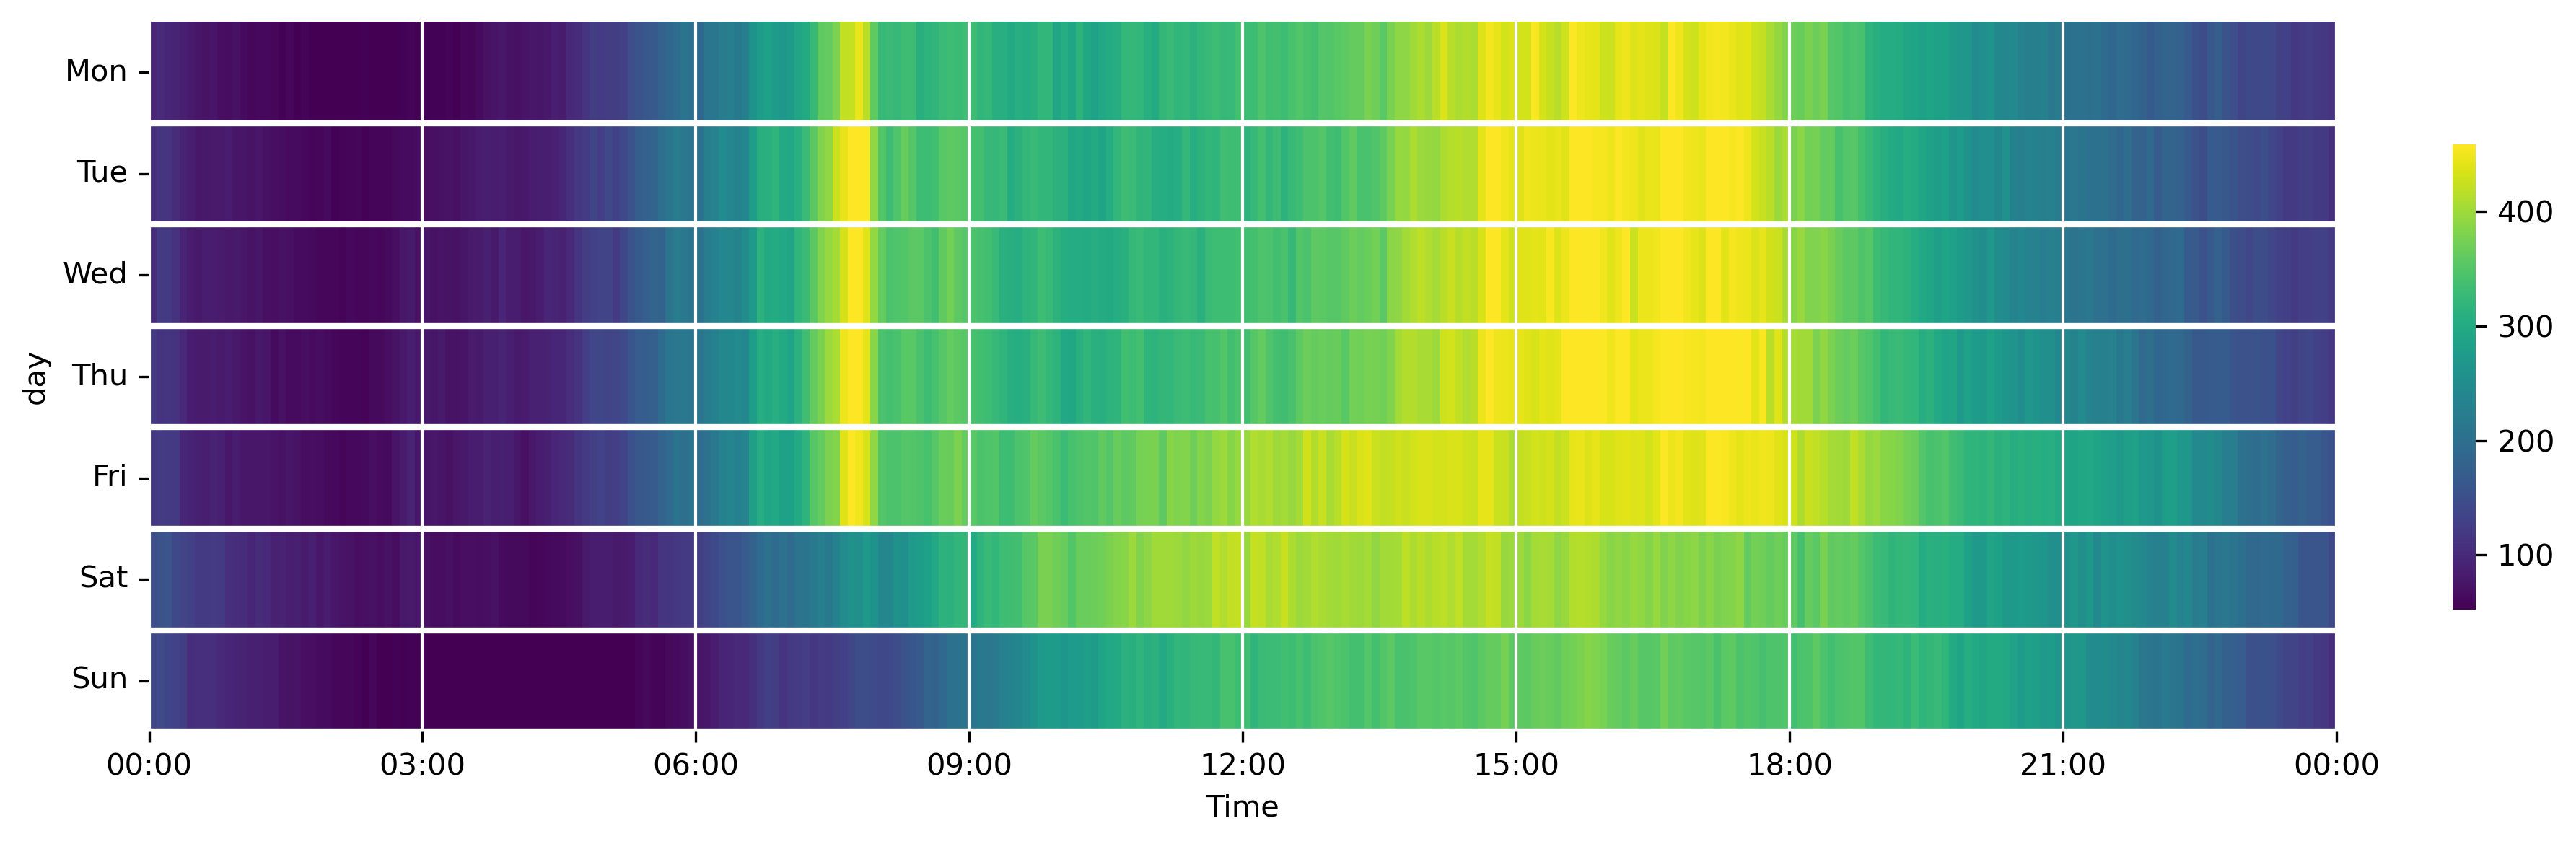

In [29]:
plt.figure(figsize=(12,4), dpi=300)

ticks = [0, 36, 72, 108, 144, 180, 216, 252, 288]
hmap = sns.heatmap(df2.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                 )


for i in range(1,df2.T.shape[0]+1):
    hmap.axhline(i, color='white', lw=2)
for j in ticks:
    hmap.axvline(j, color='white', lw=1)
    
    
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
hmap.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.tight_layout()
plt.show()

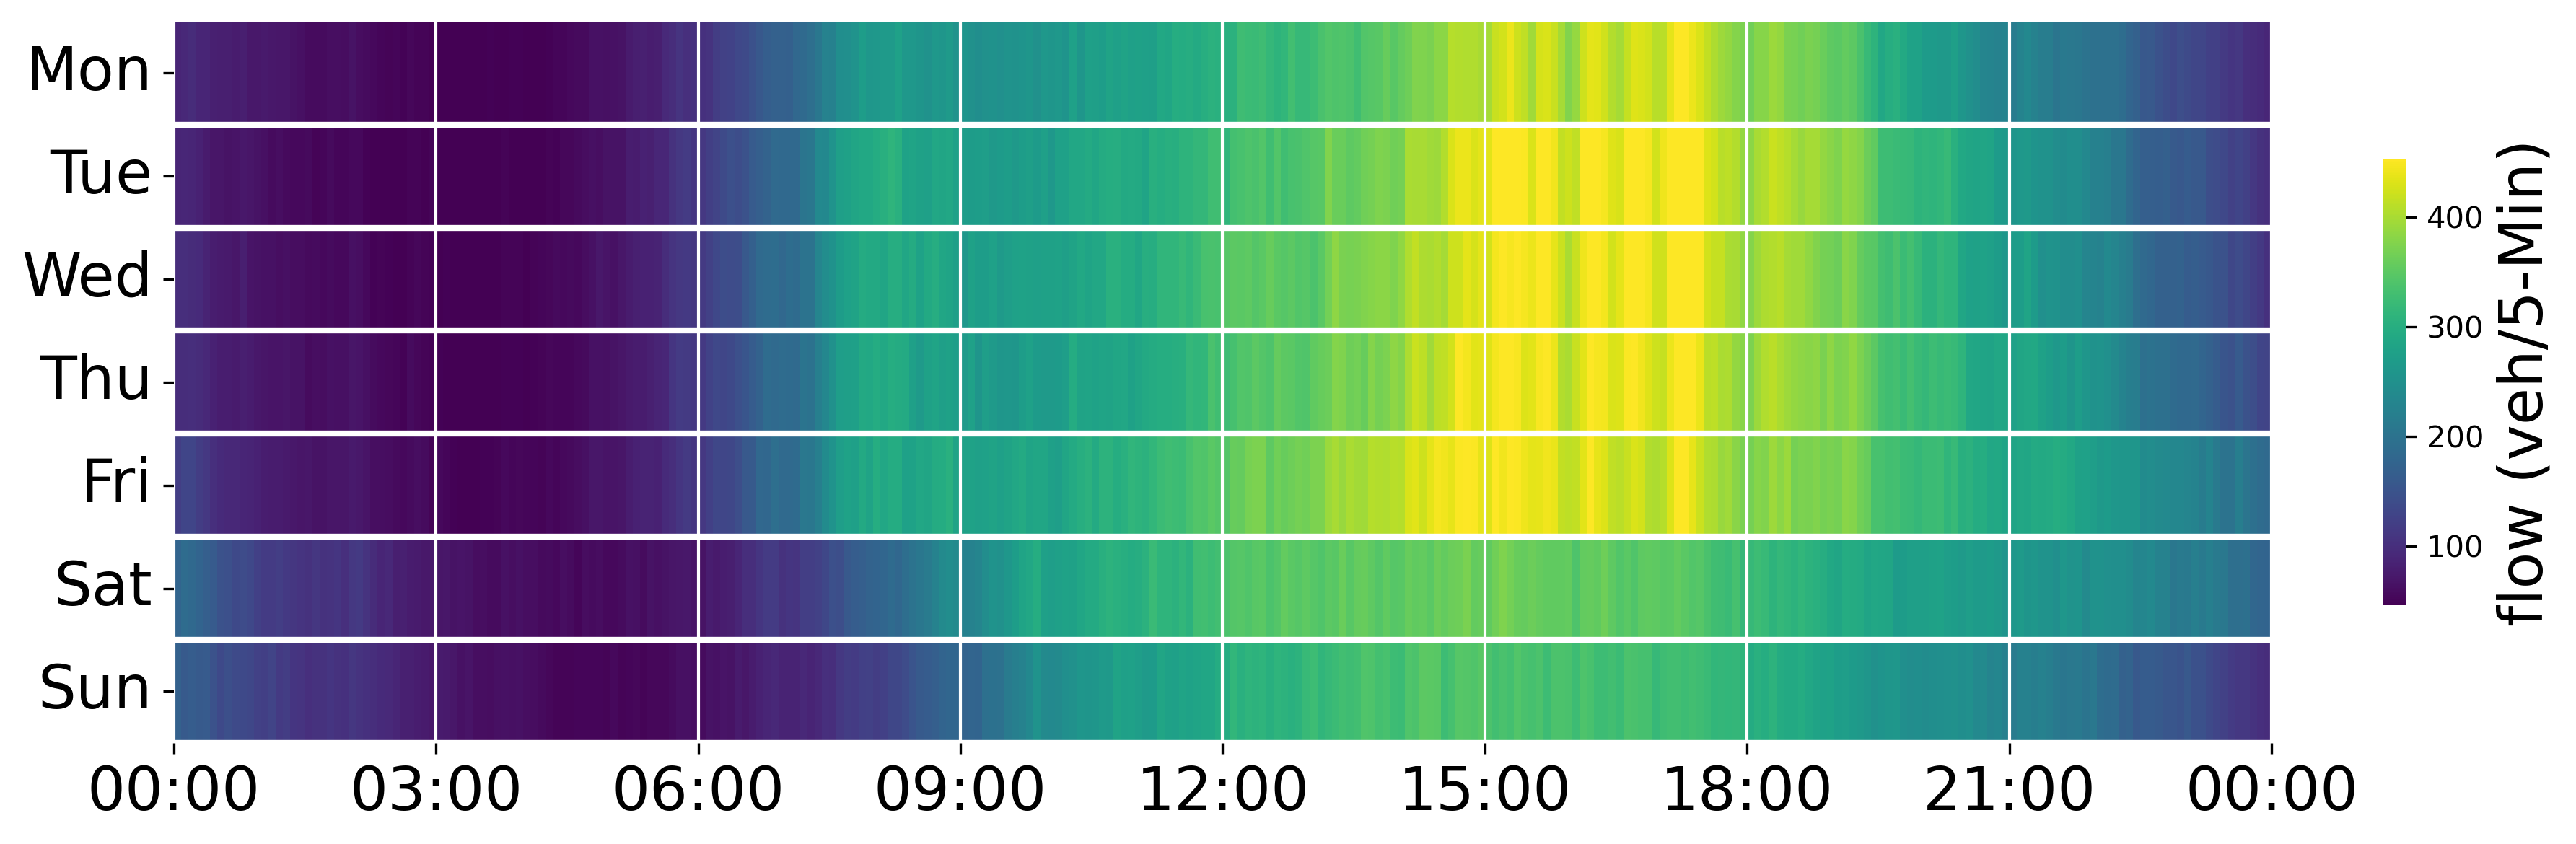

In [30]:
plt.figure(figsize=(12,4), dpi=300)

ticks = [0, 36, 72, 108, 144, 180, 216, 252, 288]
hmap = sns.heatmap(df3.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01,
                           'label': 'flow (veh/5-Min)'}, # shrink colour bar
                  cmap='viridis',
                  robust=True, 
                 )


for i in range(1,df3.T.shape[0]+1):
    hmap.axhline(i, color='white', lw=2)
for j in ticks:
    hmap.axvline(j, color='white', lw=1)
      
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
hmap.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
hmap.tick_params(which='both',labelsize= 20)
hmap.set_ylabel("")
hmap.set_xlabel("")
hmap.figure.axes[-1].yaxis.label.set_size(20)
hmap.figure.axes[-2].yaxis.label.set_size(20)
hmap.figure.axes[-1].xaxis.label.set_size(20)
plt.tight_layout()
plt.show()

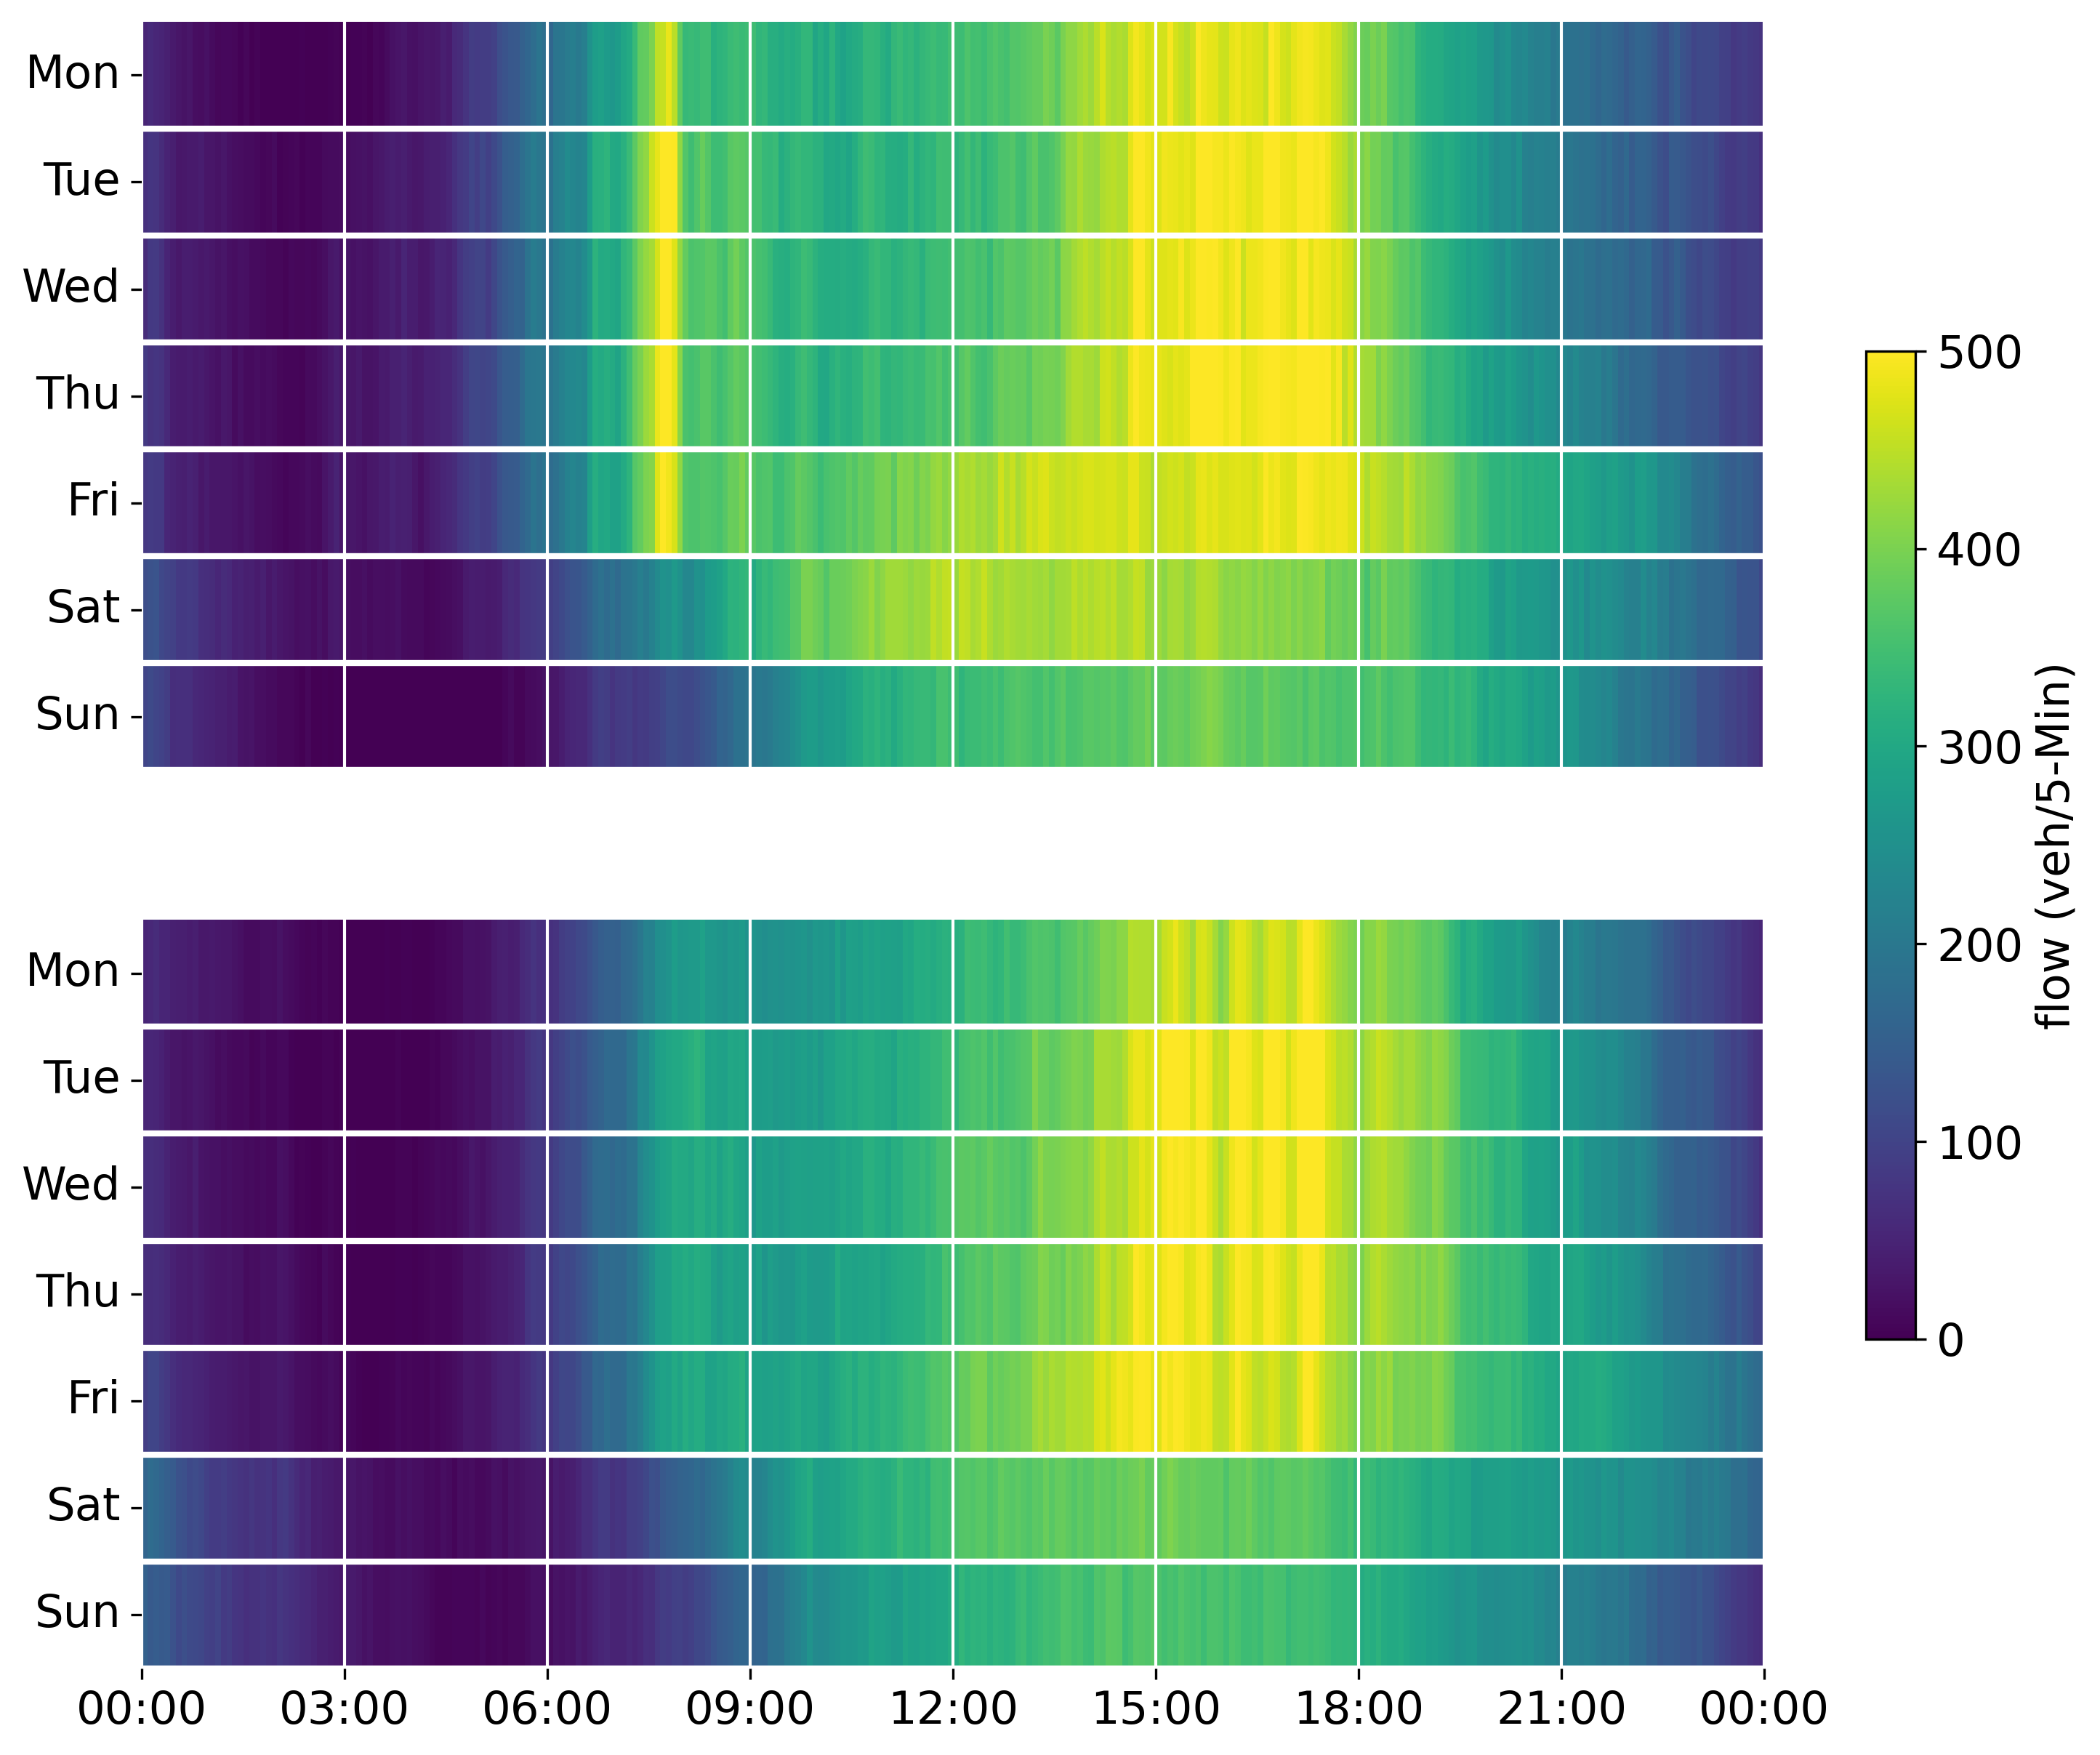

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10), dpi=300)

ticks = [0, 36, 72, 108, 144, 180, 216, 252, 288]

a = sns.heatmap( 
            df2.T,
            xticklabels=False,
            cbar=False,
            cbar_kws={'fraction' : 0.01,
                    'label': 'flow (veh/5-Min)'}, # shrink colour bar
            cmap='viridis',
            robust=True,
            ax=ax[0],
            )

for i in range(1,df2.T.shape[0]+1):
    ax[0].axhline(i, color='white', lw=2)
for j in ticks:
    ax[0].axvline(j, color='white', lw=1)
    
b = sns.heatmap(
            df3.T,
            xticklabels=False,
            cbar=False,
            cbar_kws={'fraction' : 0.01,
                    'label': 'flow (veh/5-Min)'}, # shrink colour bar
            cmap='viridis',
            robust=True,
            ax=ax[1],
            )
    
for i in range(1,df3.T.shape[0]+1):
    ax[1].axhline(i, color='white', lw=2)
for j in ticks:
    ax[1].axvline(j, color='white', lw=1)


cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=500)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = ax, label='flow (veh/5-Min)', shrink=0.6)


ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0);
ax[0].tick_params(which='both',labelsize= 15)
ax[0].set_ylabel("")
ax[0].set_xlabel("")


ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0);
ax[1].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
ax[1].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
ax[1].tick_params(which='both',labelsize= 15)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].figure.axes[-1].yaxis.label.set_size(15)
ax[1].figure.axes[-2].yaxis.label.set_size(15)
ax[1].figure.axes[-1].xaxis.label.set_size(15)
cbar.ax.tick_params(labelsize= 15);

#plt.tight_layout()
plt.plot()
plt.show()

fig.savefig('Comparison.png')

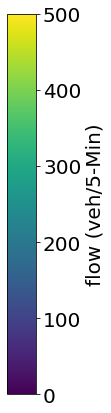

In [101]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(1, 7))
fig.subplots_adjust(left=0.5)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=500, clip=True)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('flow (veh/5-Min)',fontsize= 20)
plt.yticks(fontsize= 20);

#fig.show()